In [1]:
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


test_data= pd.read_csv('https://s3.amazonaws.com/drivendata/data/2/public/5c9fa979-5a84-45d6-93b9-543d1a0efc41.csv',index_col=0)

data = pd.read_csv('https://s3.amazonaws.com/drivendata/data/2/public/9db113a1-cdbe-4b1c-98c2-11590f124dd8.csv',index_col=0)

submission = pd.read_csv('https://s3.amazonaws.com/drivendata/data/2/public/BloodDonationSubmissionFormat.csv',index_col=0)

In [2]:

def prepare_X (X):
    if ('Made Donation in March 2007') in X.columns : # its training set than drop labels column
        X = X.drop(['Made Donation in March 2007'],axis=1)
    X = X.drop(['Total Volume Donated (c.c.)'],axis =1)
    X['new']= (X['Number of Donations'])/ (1+X["Months since Last Donation"])
    
    return X



def prepare_y(X):
    return X['Made Donation in March 2007']

X = prepare_X(data)
y = prepare_y(data)
X_pred = prepare_X(test_data)
print("")

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=27)

In [4]:
print("nulls in data : " ,data.isnull().values.any())

# pivot table

data.pivot_table(index=data.columns[-1], values=data.columns[0:-1],aggfunc=np.mean) 

nulls in data :  False


,Months since First Donation,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.)
Made Donation in March 2007,,,,
0,34.319635,10.636986,4.716895,1179.223744
1,33.195652,5.637681,7.681159,1920.289855


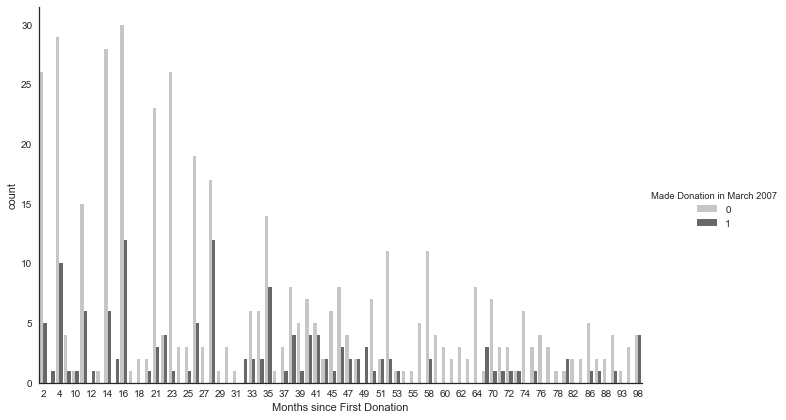

In [5]:

sns.set(style="white")

data = data

g = sns.factorplot(x="Months since First Donation",hue='Made Donation in March 2007', data=data, kind="count",
                   palette="Greys", size=6, aspect=1.5)
g.set_xticklabels(step=2)

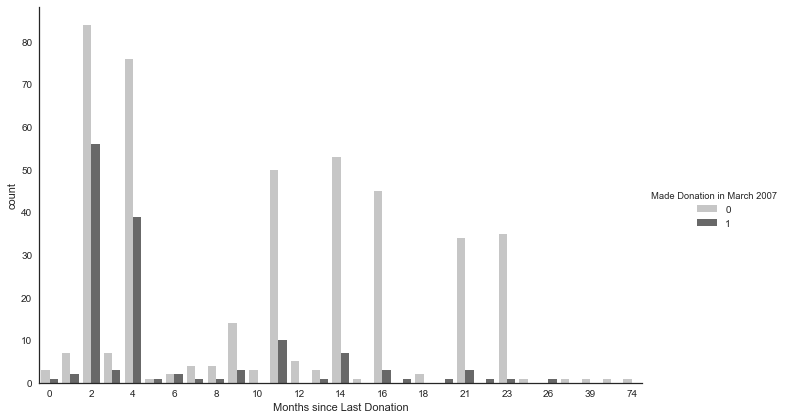

In [6]:
sns.set(style="white")

data = data

g = sns.factorplot(x="Months since Last Donation",hue='Made Donation in March 2007', data=data, kind="count",
                   palette="Greys", size=6, aspect=1.5)
g.set_xticklabels(step=2)

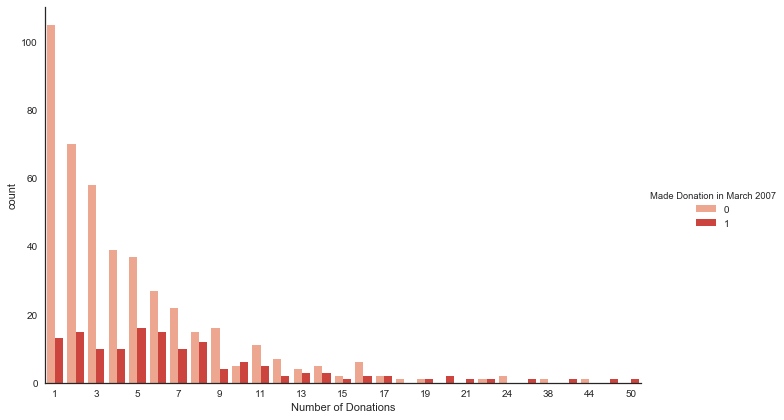

In [7]:
sns.set(style="white")

data = data

g = sns.factorplot(x='Number of Donations',hue='Made Donation in March 2007', data=data, kind="count",
                   palette="Reds", size=6, aspect=1.5)
g.set_xticklabels(step=2)

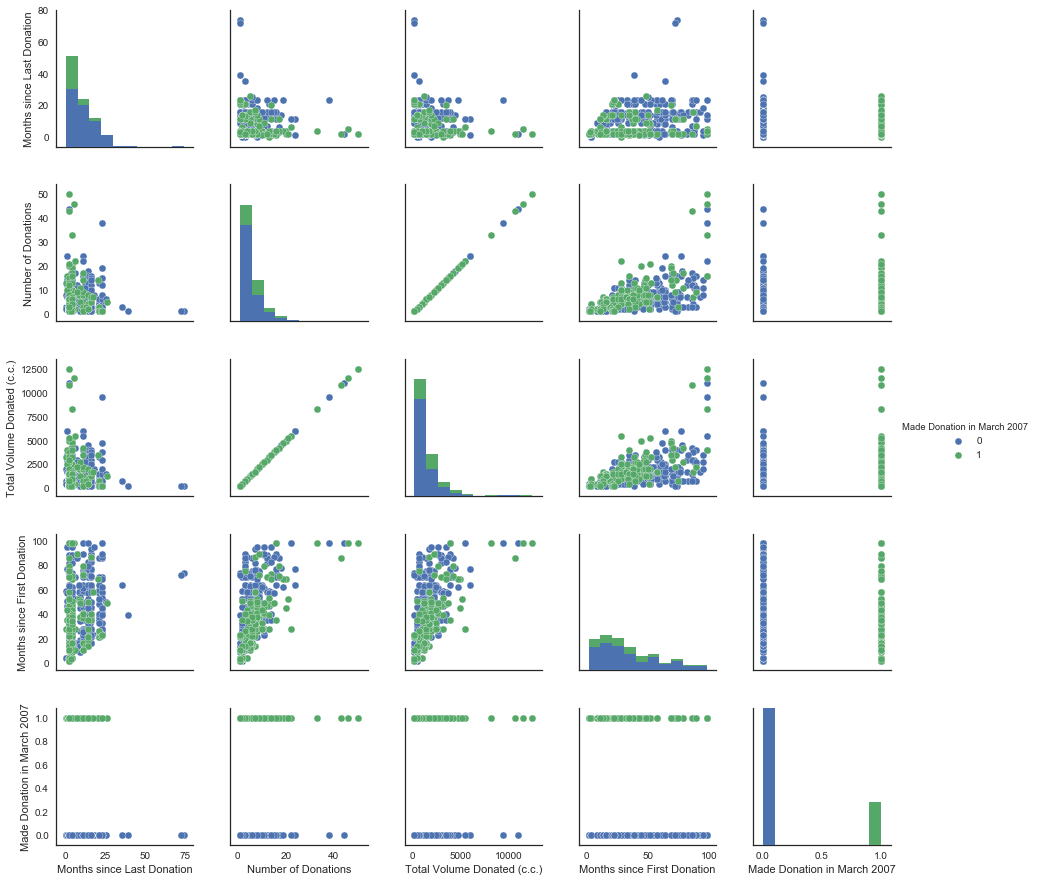

In [8]:
g = sns.pairplot(data,hue = 'Made Donation in March 2007' ,size=2.5)

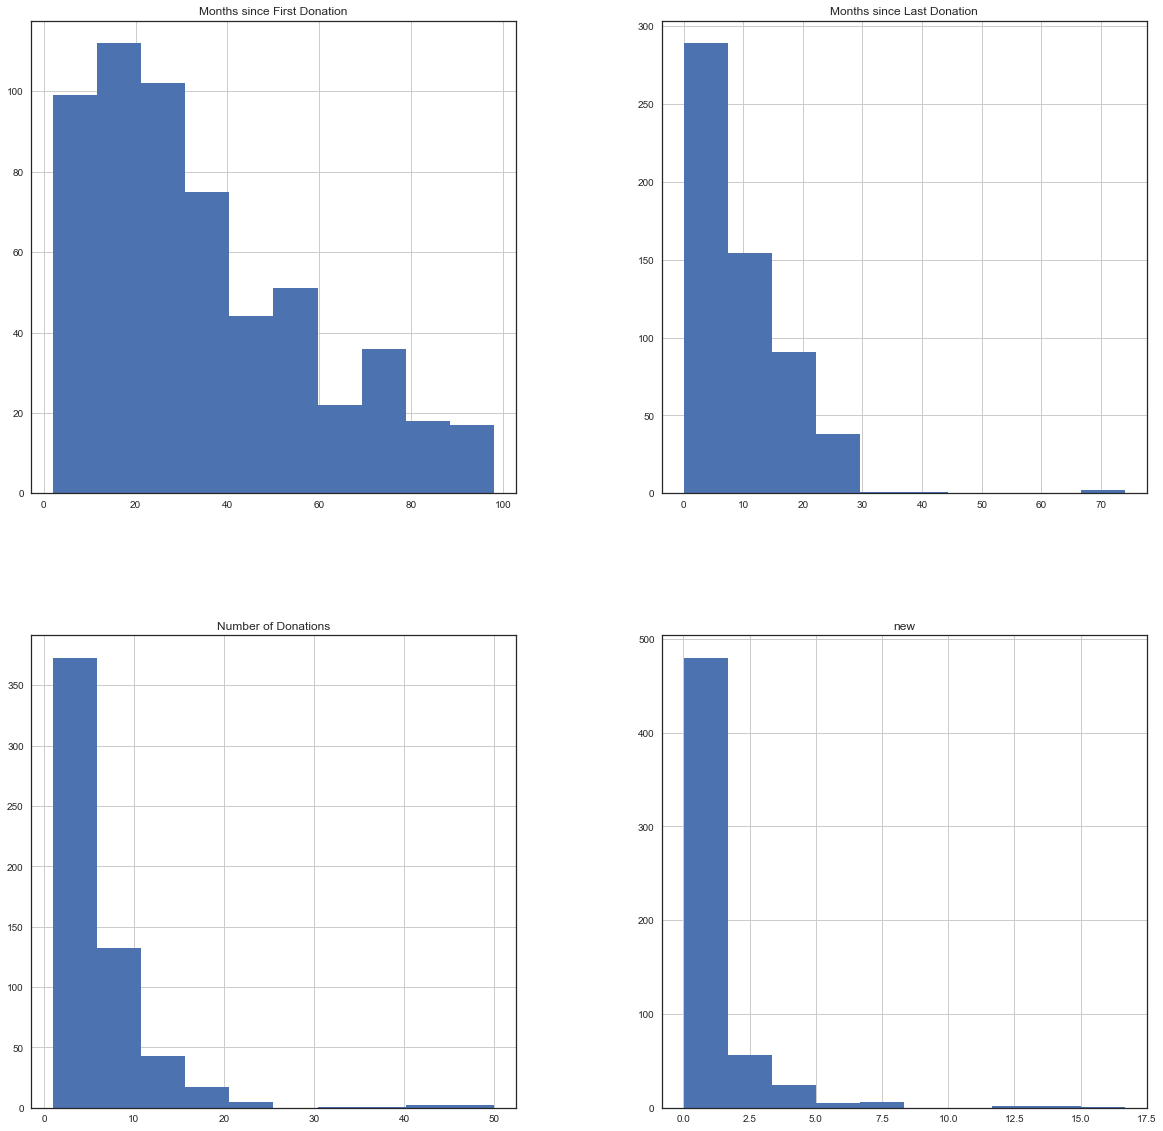

In [9]:
X.hist(figsize = (20, 20))
plt.show()

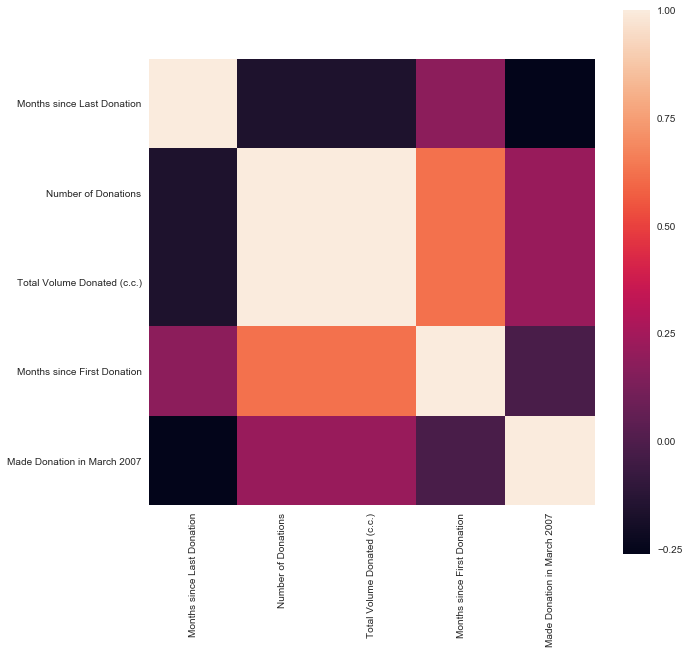

In [10]:
corrmat = data.corr()
fig = plt.figure(figsize = (10, 10))

sns.heatmap(corrmat, square = True)
plt.show()

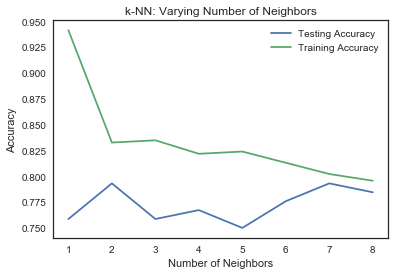

In [11]:
from sklearn.neighbors import KNeighborsClassifier

neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(k)
    knn.fit(X_train,y_train)
    train_accuracy[i] = knn.score(X_train,y_train)
    test_accuracy[i] = knn.score(X_test, y_test)

plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()


#Knn


---





In [12]:


knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,y_train)
#knn.fit(X,y)
pred_knn = knn.predict_proba(X_pred)

print(knn.score(X_test, y_test))

0.7931034482758621


In [13]:
predictions = pred_knn[:,1]
df = pd.DataFrame(predictions , columns = ["Made Donation in March 2007"],index=test_data.index)
df.to_csv("Knn.csv")



#Log Reg

In [14]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression


c_space = np.logspace(-5, 8, 15)
param_grid = {'C': c_space, 'penalty': ['l1', 'l2']}

logreg = LogisticRegression()


logreg_cv = GridSearchCV(logreg, param_grid, cv=5)

logreg_cv.fit(X_train,y_train)
#logreg_cv.fit(X,y)
pred_logreg = logreg_cv.predict_proba(X_pred)


print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_)) 
print("Best score is {}".format(logreg_cv.best_score_))

Tuned Logistic Regression Parameters: {'C': 0.05179474679231213, 'penalty': 'l1'}
Best score is 0.7652173913043478


In [15]:
predictions = pred_logreg[:,1]
df = pd.DataFrame(predictions , columns = ["Made Donation in March 2007"],index=test_data.index)
df.to_csv("LogregCV.csv")